In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("company Hdata.csv",na_values = ['#NAME?'])

In [13]:
df.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [6]:
df.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [7]:
# data preprocessing
# Fill rows without company name, Age, Salary and Place
df['Company'].fillna('Flex', inplace = True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Place'].fillna('Banglore', inplace=True)
df.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [8]:
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', 'Flex', 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [9]:
df.Place.unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Banglore', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [10]:
df.Age.unique()

array([20.        , 30.        , 35.        , 40.        , 23.        ,
       30.48461538, 34.        , 45.        , 18.        , 22.        ,
       32.        , 37.        , 50.        , 21.        , 46.        ,
       36.        , 26.        , 41.        , 24.        , 25.        ,
       43.        , 19.        , 38.        , 51.        , 31.        ,
       44.        , 33.        , 17.        ,  0.        , 54.        ])

In [11]:
# Average salary of employees in company
print("The Average salary of employees in various companies")
df.groupby("Company").agg({"Salary":['mean']})

The Average salary of employees in various companies


,Salary
,mean
Company,
CTS,4897.448477
Congnizant,2934.000000
Flex,5852.550403
Infosys,5202.086022
Infosys Pvt Lmt,8202.000000
TCS,5472.845405
Tata Consultancy Services,8345.000000


In [12]:
#Average age of employees
print("The Average Age of employees in various companies")
df.groupby("Company").agg({"Age":['mean']})

The Average Age of employees in various companies


,Age
,mean
Company,
CTS,32.194444
Congnizant,21.500000
Flex,28.121154
Infosys,32.241709
Infosys Pvt Lmt,21.500000
TCS,28.752395
Tata Consultancy Services,33.500000


In [13]:
#Number of employees in company
print("The number of employees in various companies")
Employeecount = df.groupby(df['Company']).count()[["Gender"]]
Employeecount.rename(columns={'Gender':'Count'})

The number of employees in various companies


,Count
Company,
CTS,36
Congnizant,2
Flex,8
Infosys,45
Infosys Pvt Lmt,2
TCS,53
Tata Consultancy Services,2


In [45]:
#Count of male and female employees
print("Number of male and female salary by Company and City")
maleemp = df[df["Gender"] == 1]
print("Male employee:",maleemp.count()[["Company"]]) 
Femaleemp = df[df["Gender"] == 0]
print("Female employee:",Femaleemp.count()[["Company"]])



Number of male and female salary by Company and City
Male employee: Company    32
dtype: int64
Female employee: Company    108
dtype: int64


In [17]:
#Average salary based on city
print("Average salary by Company and City")
Salarycit = df.groupby(["Company","Place"]).agg({'Salary':['mean']})
print(Salarycit)

Average salary by Company and City
                                           Salary
                                             mean
Company                   Place                  
CTS                       Banglore    8157.489247
                          Calcutta    3771.419355
                          Chennai     4685.155914
                          Cochin      2903.366935
                          Delhi       9142.000000
                          Hyderabad   5448.822581
                          Mumbai      4268.541219
                          Noida       1089.000000
                          Podicherry  5659.000000
                          Pune        7156.233871
Congnizant                Mumbai      2934.000000
                          Noida       2934.000000
Flex                      Banglore    8943.000000
                          Calcutta    4383.233871
                          Chennai     8943.000000
                          Delhi       5312.467742
               

In [18]:
#Average age of employees in various companies according to place
print("The average age of employees of companies in various branches")
df.groupby(["Company","Place"]).agg({'Age':['mean']})

The average age of employees of companies in various branches


Age
                                           mean
Company                   Place                
CTS                       Banglore    35.666667
                          Calcutta    25.428571
                          Chennai     41.333333
                          Cochin      30.000000
                          Delhi       45.000000
                          Hyderabad   40.333333
                          Mumbai      30.777778
                          Noida       33.000000
                          Podicherry  22.000000
                          Pune        32.500000
Congnizant                Mumbai      21.000000
                          Noida       22.000000
Flex                      Banglore    25.000000
                          Calcutta    31.742308
                          Chennai     22.000000
                          Delhi       30.484615
                          Hyderabad   35.000000
                          Mumbai      24.000000
                          Noida       25.000000
Infosys                   Banglore    27.161538
                          Bhopal      26.000000
                          Calcutta    28.044056
                          Chennai     33.989744
                          Cochin      30.096923
                          Delhi       42.166667
                          Hyderabad   41.828205
                          Mumbai      31.906294
                          Noida       30.000000
                          Podicherry  23.000000
Infosys Pvt Lmt           Chennai     21.000000
                          Mumbai      22.000000
TCS                       Banglore    31.247436
                          Calcutta    30.305325
                          Chennai     23.161538
                          Cochin      29.621154
                          Delhi       24.800000
                          Hyderabad   33.000000
                          Mumbai      27.613018
                          Nagpur      32.000000
                          Noida       34.250000
Tata Consultancy Services Banglore    36.000000
                          Mumbai      31.000000

In [6]:
Place_count = df.groupby(['Place']).count()
Place_count

,Company,Age,Salary,Country,Gender
Place,,,,,
Bhopal,1,1,1,1,1
Calcutta,31,29,28,33,33
Chennai,13,10,11,14,14
Cochin,13,11,12,13,13
Delhi,13,13,12,14,14
Hyderabad,7,7,6,8,8
Mumbai,36,33,29,37,37
Nagpur,1,1,1,1,1
Noida,7,8,7,8,8


The Salary graph according to Age


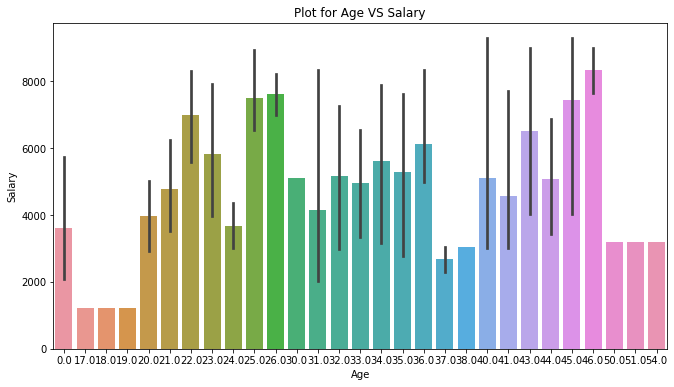

In [19]:
plt.figure(figsize = (11,6))
plt.title("Plot for Age VS Salary")

#defining bar plot here
print("The Salary graph according to Age")
sns.barplot(x = df['Age'],  y = df['Salary'])

Text(0, 0.5, 'Salary')

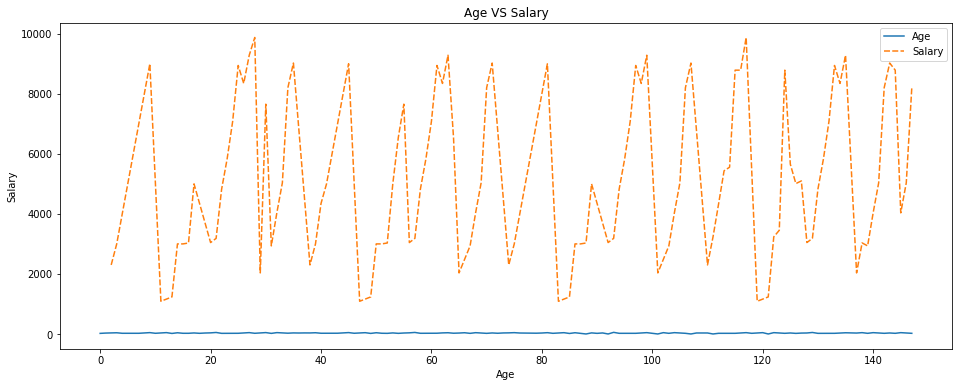

In [6]:
plt.figure(figsize = (16,6))
#add a title
plt.title("Age VS Salary")
sns.lineplot(data = df[['Age','Salary']])
plt.xlabel('Age')
plt.ylabel('Salary')